In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

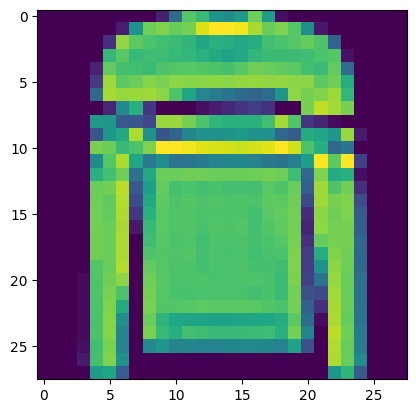

In [3]:
plt.imshow(x_train[5]);

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
class_names[y_train[10]]

'T-shirt/top'

In [6]:
# there are 60,000 images which are 28 X 28 pixels
x_train.shape

(60000, 28, 28)

In [7]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

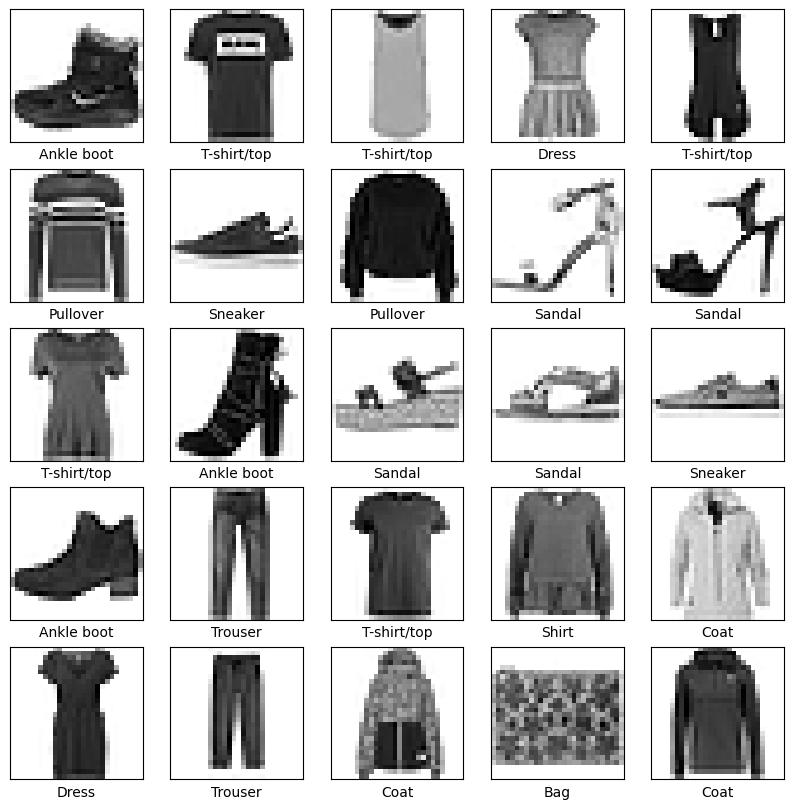

In [10]:
plt.figure(figsize=(10,10))
for a in range(25):
    plt.subplot(5,5,a+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[a], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[a]])
plt.show()

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Input(shape=[28, 28]))
model.add(Flatten())
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax")) # number of out0

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
* Loss function: This measures how accurate the model is during training. we want to minimize this function to "steer" the model in the right direction.
* Optimizer: This is how the model is updated based on the data it sees and its loss function.
* Metrics: Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [13]:
model_history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6710 - loss: 1.0268
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8255 - loss: 0.5028
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8434 - loss: 0.4496
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8541 - loss: 0.4193
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8617 - loss: 0.3978
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8663 - loss: 0.3809
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8702 - loss: 0.3669
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8741 - loss: 0.3547
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8775 - loss: 0.3434
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8803 - loss: 0.3334
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8839 - loss: 0.3243
Epoch 12/30
1875/1875 ━━━━━━━━

In [14]:
accuracy_loss = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8673 - loss: 0.3846


In [15]:
prediction = model.predict(x_test)
prediction[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([1.6041147e-05, 2.7138734e-08, 9.9957508e-01, 1.7179243e-08,
       3.8611688e-04, 4.2356621e-10, 2.2801330e-05, 1.9927643e-10,
       5.4002482e-09, 1.3504966e-12], dtype=float32)

In [16]:
np.argmax(prediction[1])

2

In [17]:
y_test[1]

2

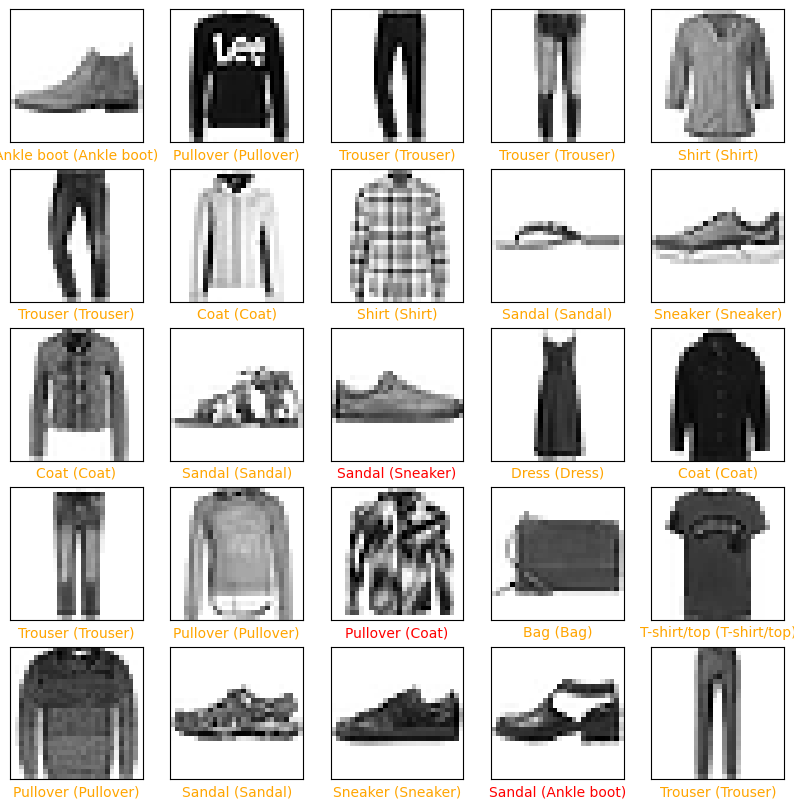

In [18]:
# Plot the first 25 test images, their predicted label, and the main label
# Color correct predictions in orange, incorrect prediction in red
plt.figure(figsize=(10,10))
for a in range(25):
    plt.subplot(5,5,a+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_test[a], cmap=plt.cm.binary)
    predicted_y = np.argmax(prediction[a])
    main_label = y_test[a]
    if predicted_y == main_label:
        color = 'orange'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_y],
                                class_names[main_label]),
                                color=color)